<a href="https://colab.research.google.com/github/ArcWaterCash/statistics/blob/main/1_%E6%8E%A2%E7%B4%A2%E7%9A%84%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf practical-statistics-for-data-scientists
!git clone https://github.com/gedeck/practical-statistics-for-data-scientists.git
data_dir = 'practical-statistics-for-data-scientists/data'

Cloning into 'practical-statistics-for-data-scientists'...
remote: Enumerating objects: 206, done.
remote: Total 206 (delta 0), reused 0 (delta 0), pack-reused 206
Receiving objects: 100% (206/206), 75.76 MiB | 37.94 MiB/s, done.
Resolving deltas: 100% (85/85), done.


# 1.3 位置の推定

In [2]:
import pandas as pd
state = pd.read_csv(f'{data_dir}/state.csv')
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [3]:
# 平均値：外れ値の影響を受けやすい
state['Population'].mean()

6162876.3

In [4]:
# トリム平均：外れ値の影響を受けにくい
from scipy.stats import trim_mean
trim_mean(state['Population'], 0.1)

4783697.125

In [5]:
# 中央値：外れ値の影響を受けにくい
state['Population'].median()

4436369.5

In [6]:
# 加重平均
import numpy as np
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [7]:
# 加重中央値
!pip install wquantiles
import wquantiles
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

# 1.4 散らばりの推定

In [8]:
# 標準偏差
state['Population'].std()

6848235.347401142

In [9]:
# 四分位数
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

In [10]:
# 中央偏差
from statsmodels import robust
robust.scale.mad(state['Population'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


3849876.1459979336

# 1.5 データ分布の探索

In [11]:
# パーセンタイル
state['Murder.Rate'].quantile([.05, .25, .50, .75, .95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population(million)')

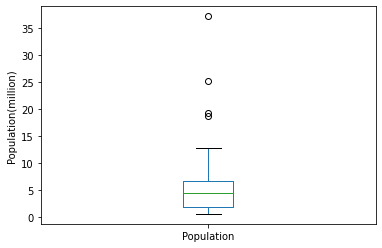

In [12]:
# 箱ひげ図
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population(million)')

In [13]:
# 度数分布
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population(million)')

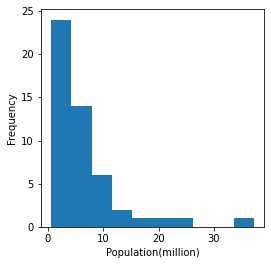

In [14]:
# ヒストグラム
ax = (state['Population']/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population(million)')

Text(0.5, 0, 'Murder.Rate(per 100,000')

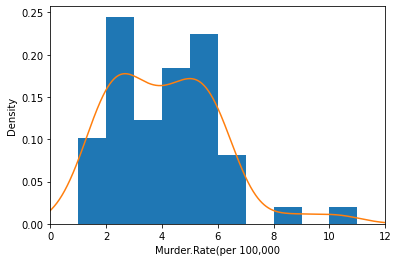

In [15]:
# 密度プロット
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder.Rate(per 100,000')

# 1.6 二値データとカテゴリデータの探索

In [16]:
dfw = pd.read_csv(f'{data_dir}/dfw_airline.csv')
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


Text(0, 0.5, 'Count')

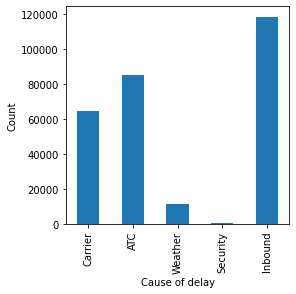

In [17]:
# 棒グラフ
ax = dfw.transpose().plot.bar(figsize=(4,4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

# 1.7 相関

In [18]:
sp500_px = pd.read_csv(f'{data_dir}/sp500_data.csv.gz', index_col=0)
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,ADI,AVGO,BRCM,FSLR,INTC,LLTC,MCHP,MU,NVDA,QRVO,QCOM,SWKS,TXN,XLNX,AAPL,HPQ,EA,SNDK,STX,WDC,TEL,HRS,MSI,ACN,AMAT,KLAC,LRCX,ADBE,ADSK,ORCL,...,ENDP,LLY,MNK,MRK,MYL,PRGO,PFE,ZTS,ABT,A,BCR,BAX,BDX,BSX,EW,HSP,ISRG,JNJ,MDT,PKI,STJ,SYK,TMO,VAR,ZBH,BMY,CAH,CERN,ESRX,MCK,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,-0.015785,0.0,0.0,0.0,-0.050488,-0.089870,0.0,0.037021,0.0,0.0,-0.044718,-0.041262,0.060179,0.033152,-0.024235,0.045586,0.12500,0.0,0.0,0.118103,0.0,0.016412,-1.842719,0.0,-0.012867,0.079940,0.246706,-0.044884,0.057267,-0.005776,...,0.0,-0.077535,0.0,-0.028797,0.166355,-0.577943,0.066591,0.0,0.045961,0.0,-0.326659,0.000000,-0.033363,0.06250,0.0,0.0,0.0,0.018827,0.006047,0.000000,0.187132,0.276317,-0.124187,0.037430,0.0,0.038546,0.060142,0.03126,0.00195,0.0,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,-0.015793,0.0,0.0,0.0,0.095367,0.044935,0.0,0.037020,0.0,0.0,0.006387,-0.041252,0.102317,0.099446,0.064618,0.072942,0.09375,0.0,0.0,0.000000,0.0,-0.032829,0.594428,0.0,0.016077,0.019985,0.411170,0.134672,0.057267,0.025999,...,0.0,-0.031014,0.0,-0.172781,-0.066536,0.346766,-0.027745,0.0,-0.045960,0.0,-0.093331,0.018157,0.100076,0.03125,0.0,0.0,0.0,-0.056481,-0.048392,0.041782,-0.074851,-0.027632,0.000000,-0.074859,0.0,-0.038546,0.060142,0.10156,0.01953,0.0,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,0.047363,0.0,0.0,0.0,0.000000,0.067402,0.0,0.123402,0.0,0.0,0.035141,0.041252,-0.024066,0.016572,-0.016148,-0.045586,-0.06250,0.0,0.0,0.118103,0.0,-0.032829,0.237767,0.0,0.051450,0.000000,0.054828,0.082299,-0.042955,-0.011562,...,0.0,-0.062028,0.0,-0.143984,-0.066536,0.693532,-0.133183,0.0,-0.153198,0.0,-0.093331,-0.072626,0.000000,0.03125,0.0,0.0,0.0,-0.018827,0.000000,0.208912,0.018711,-0.027632,0.000000,0.044923,0.0,-0.115639,-0.030071,-0.01562,0.00000,0.0,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,0.205236,0.0,0.0,0.0,-0.050495,0.022467,0.0,-0.012340,0.0,0.0,0.006387,0.041252,-0.024073,0.049723,-0.032305,-0.091184,0.21875,0.0,0.0,0.059052,0.0,0.049247,-0.118893,0.0,0.000000,0.039970,-0.054828,-0.149639,0.057267,0.002884,...,0.0,0.139564,0.0,0.345561,0.133081,0.693532,0.022199,0.0,0.168520,0.0,0.093331,0.090783,0.044480,0.03125,0.0,0.0,0.0,0.263578,0.030243,0.125347,0.187140,0.000000,0.124187,0.104805,0.0,0.141333,0.000000,-0.01172,0.02344,0.0,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,-0.031570,0.0,0.0,0.0,0.000000,0.022467,0.0,-0.074041,0.0,0.0,0.051113,0.041252,-0.024073,-0.008290,-0.016157,-0.109414,0.09375,0.0,0.0,-0.118103,0.0,0.000000,-0.237776,0.0,-0.003219,-0.099925,-0.246706,0.000000,-0.157480,-0.017329,...,0.0,0.000000,0.0,-0.345561,-0.133073,-0.924709,-0.016648,0.0,-0.061282,0.0,0.186662,0.000000,-0.011123,-0.15625,0.0,0.0,0.0,0.018827,-0.024196,0.167129,-0.187629,-0.082895,0.341510,-0.029946,0.0,-0.115635,0.060142,-0.00782,-0.01562,0.0,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [19]:
sp500_sym = pd.read_csv(f'{data_dir}/sp500_sectors.csv')
sp500_sym.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


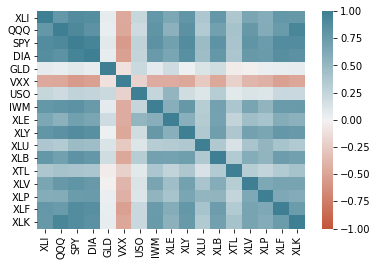

In [20]:
# ヒートマップ
import seaborn as sns
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', sp500_sym[sp500_sym['sector']=='etf']['symbol']]
sns.heatmap(etfs.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

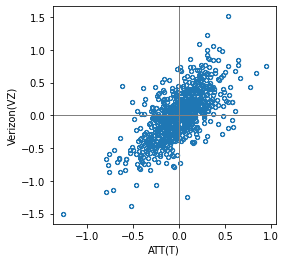

In [21]:
# 散布図
telecom = sp500_px.loc[sp500_px.index > '2012-07-01', sp500_sym[sp500_sym['sector']=='telecommunications_services']['symbol']]
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4,4), marker='$\u25EF$')
ax.set_xlabel('ATT(T)')
ax.set_ylabel('Verizon(VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

# 1.8 ２つ以上の変量の探索

In [22]:
kc_tax = pd.read_csv(f'{data_dir}/kc_tax.csv.gz')
kc_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [23]:
kc_tax0 = kc_tax.loc[(kc_tax['TaxAssessedValue'] < 750_000) &
                      (kc_tax['SqFtTotLiving'] > 100) & 
                      (kc_tax['SqFtTotLiving'] < 3500), :]
kc_tax0.shape

(432693, 3)

Text(0, 0.5, 'Tax-Assessed Value')

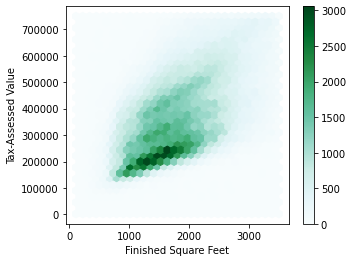

In [24]:
# 六角ビニング
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize=30, sharex=False, figsize=(5,4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Tax-Assessed Value')

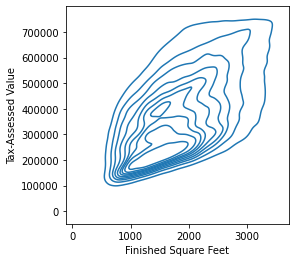

In [25]:
# 等高線プロット
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.kdeplot(kc_tax0['SqFtTotLiving'], kc_tax0['TaxAssessedValue'], ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

In [26]:
lc_loans = pd.read_csv(f'{data_dir}/lc_loans.csv')
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [27]:
# 2つのカテゴリ変数の探索
crosstab = lc_loans.pivot_table(index='grade', columns='status', aggfunc=lambda x: len(x), margins=True)
df = crosstab.loc['A':'G', :].copy()
df.loc[:, 'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


In [28]:
# 2つのカテゴリ変数の探索
crosstab = lc_loans.pivot_table(index='grade', columns='status', aggfunc=len, margins=True)
df = crosstab.loc['A':'G', :].copy()
df.loc[:, 'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


In [29]:
airline_stats = pd.read_csv(f'{data_dir}/airline_stats.csv')
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

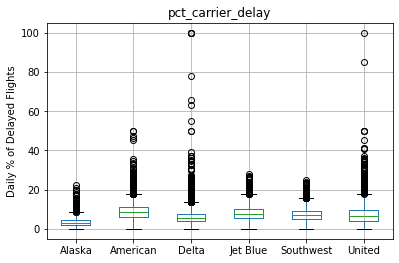

In [30]:
# カテゴリデータと数量データ
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, '')

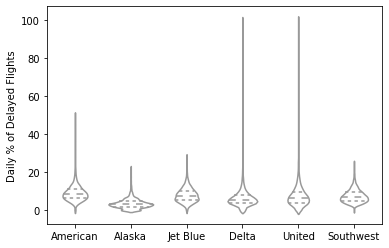

In [31]:
# バイオリンプロット
ax = sns.violinplot(airline_stats['airline'], airline_stats['pct_carrier_delay'], inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

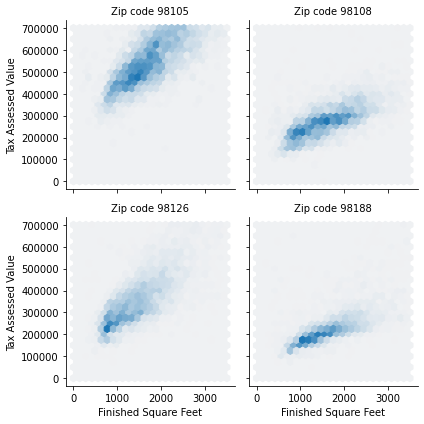

In [32]:
# 多変量の可視化
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')